In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

## Create data
Build time series

In [4]:
n_ts = 61

# create the main time series for each group
x = np.linspace(0, 5, n_ts)
scale = 4

Ts = []
ts1 = scale * np.sin(x); Ts.append(ts1)
ts2 = scale * (np.cos(1 + x*3) + np.linspace(0, 1, n_ts)) ; Ts.append(ts2)
ts3 = scale * (np.sin(2 + x*6) + np.linspace(0, -1, n_ts)); Ts.append(ts3)
ts4 = scale * (np.cos(3 + x*9) + np.linspace(0, 4, n_ts)); Ts.append(ts4)
ts5 = scale * (np.sin(4 + x*12) + np.linspace(0, -4, n_ts)); Ts.append(ts5)
ts6 = scale * np.cos(x); Ts.append(ts6)

Build time series groups

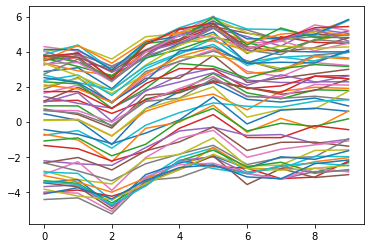

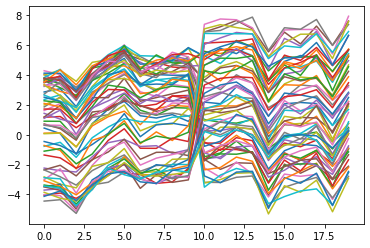

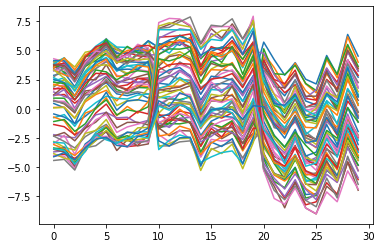

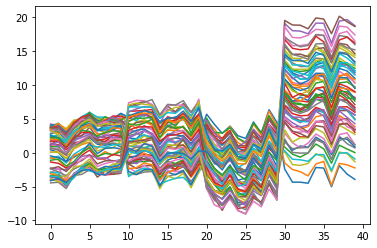

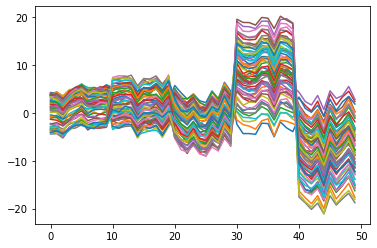

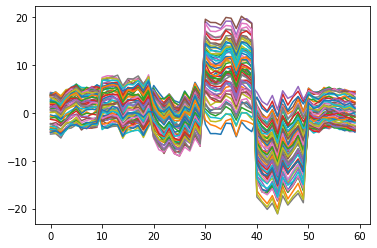

In [21]:
n_gr = 10

df = pd.DataFrame()
for ts in Ts:
    ts = ts + np.random.rand(n_gr, n_ts) + np.random.randn(n_gr, 1)
    df = df.append(pd.DataFrame(ts))
    plt.plot(df.values)
    plt.show()

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.444977,0.102693,0.905243,1.169053,1.431953,1.182885,1.619671,1.860780,1.991020,2.358249,...,-3.082576,-3.367835,-4.052445,-3.706084,-3.492206,-4.010843,-4.442577,-3.856046,-3.438651,-4.123929
1,0.076698,0.129269,0.897054,1.218022,1.044915,1.961659,2.086532,2.525881,2.468366,2.661980,...,-3.451421,-3.522473,-3.903222,-3.608947,-3.721708,-4.078888,-4.349032,-4.248643,-3.570787,-3.765038
2,-1.308810,-0.806036,-0.266080,0.469744,0.777916,1.093386,1.089972,1.055394,1.611095,1.499878,...,-4.024429,-4.643660,-4.255152,-4.839688,-4.980088,-5.121705,-5.264587,-4.441532,-4.750302,-4.401481
3,0.742454,0.589589,1.294878,1.230309,1.739553,2.479940,2.595547,2.855435,2.716862,3.024613,...,-3.214488,-3.530952,-3.665712,-3.581154,-3.415958,-3.152457,-3.358581,-3.544552,-3.669114,-3.341776
4,1.708443,1.207015,1.699134,1.811916,2.639773,2.481790,3.452624,3.436708,3.671740,3.860283,...,-2.697441,-2.238847,-2.215129,-2.213120,-2.733700,-2.453701,-3.179821,-2.732432,-2.229991,-2.616526


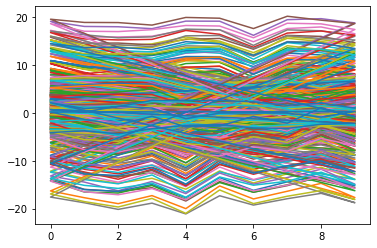

In [22]:
plt.plot(df);

## TS Clustering

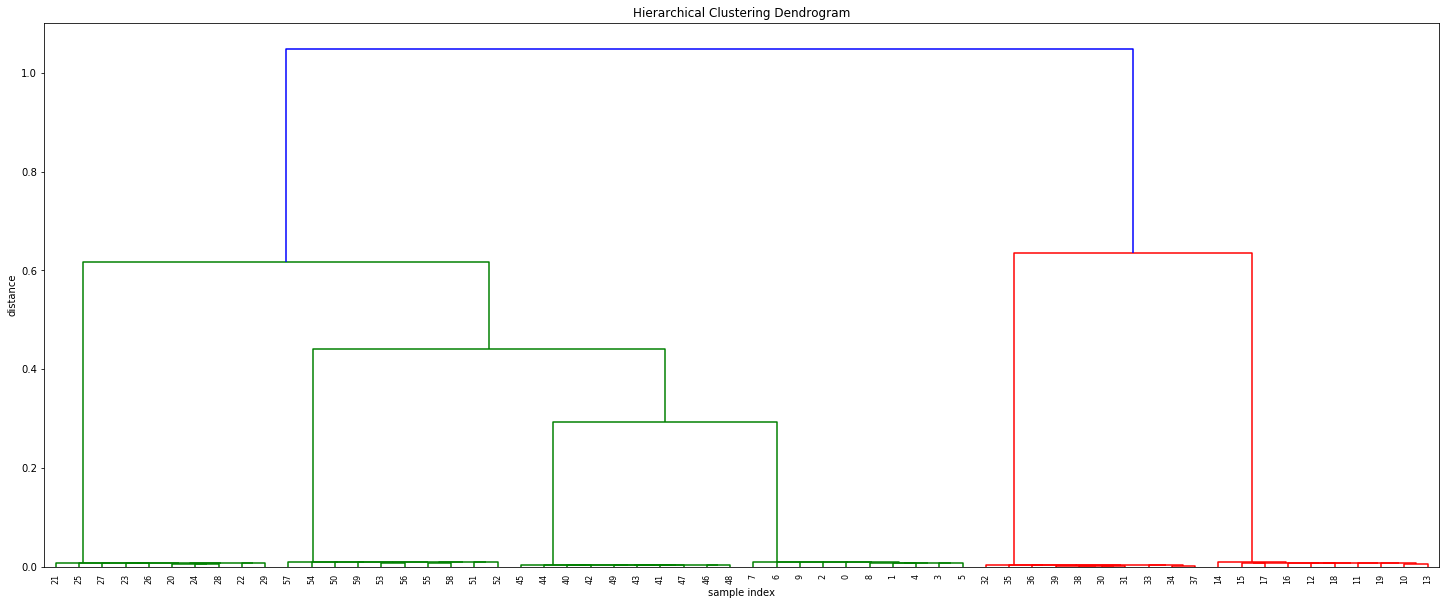

In [23]:
lnk = sch.linkage(df, method='single', metric='correlation')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(lnk, leaf_rotation=90., leaf_font_size=8., )
plt.show()

## Apply custom distance metric

In [24]:
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r 

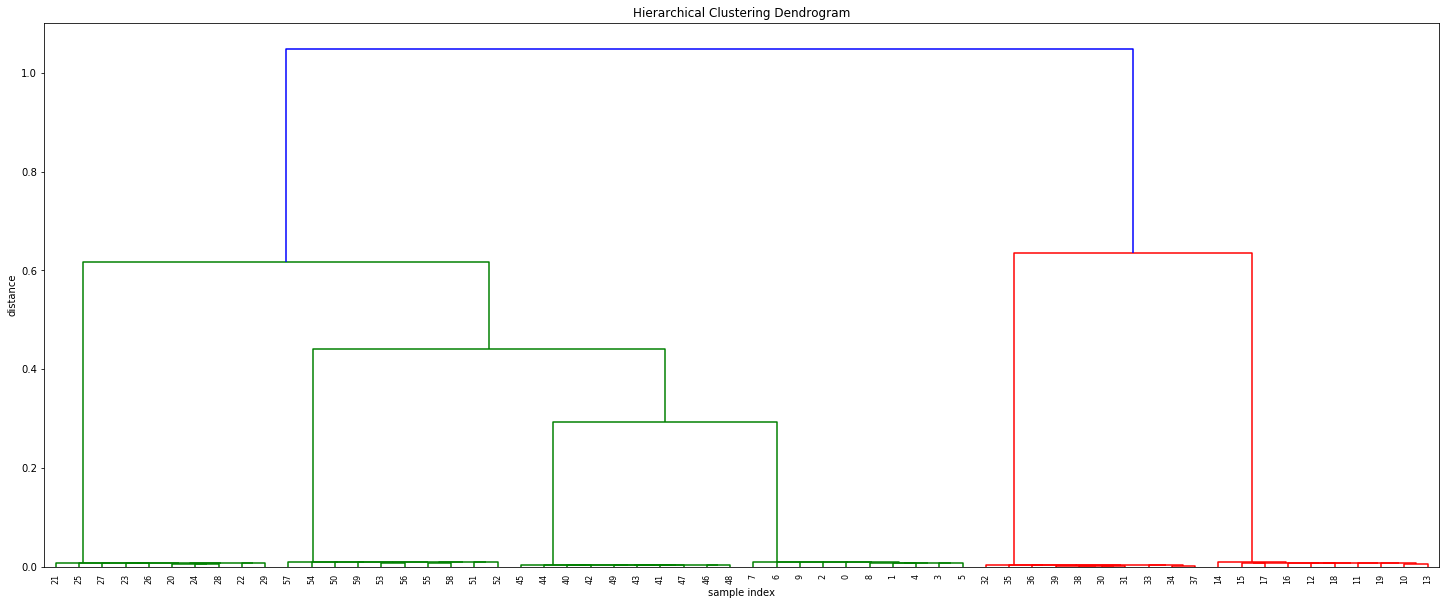

In [25]:
lnk = sch.linkage(df,  method='single', metric=my_metric)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(lnk, leaf_rotation=90., leaf_font_size=8., )
plt.show()

## Retrieve clusters

In [30]:
def clustering(lnk, k_clusters):
    results = sch.fcluster(lnk, k_clusters, criterion='maxclust')
    return pd.Series(results)

In [31]:
res = clustering(lnk, k_clusters=6)
res.head(20)

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
dtype: int32

Cluster  4  :  10  time series


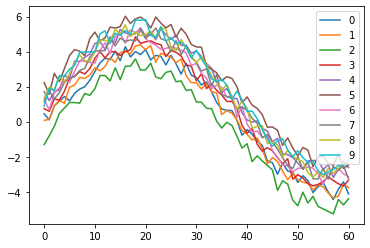

Cluster  6  :  10  time series


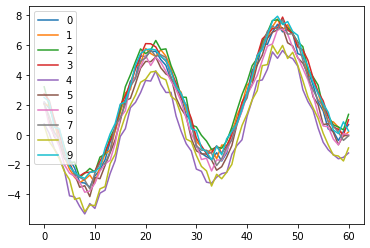

Cluster  1  :  10  time series


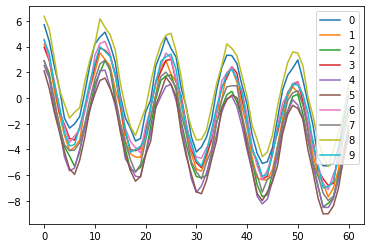

Cluster  5  :  10  time series


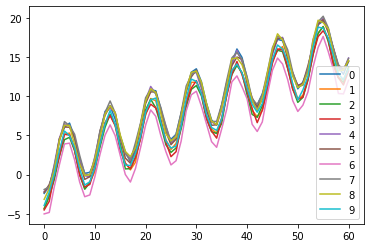

Cluster  3  :  10  time series


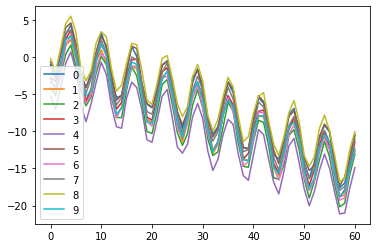

Cluster  2  :  10  time series


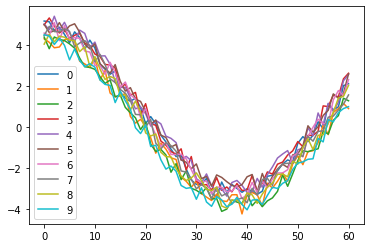

In [32]:
clusters = res.unique()
for c in clusters:
    cluster_idxs = res[res==c].index
    print('Cluster ', c, ' : ', len(cluster_idxs), ' time series')
    df.T.iloc[:,cluster_idxs].plot()
    plt.show()

## Credits & Links

https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas